In [1]:
#coding:utf-8
import pandas as pd
from sklearn.metrics import f1_score,auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
dir = '../public_fu/'

In [2]:
df_test = pd.read_csv(dir + 'evaluation_public.csv')
df_train = pd.read_csv(dir + 'train.csv')
df_train = df_train.drop(['ENDDATE'],axis=1)
EID = df_test.copy()
df_entbase = pd.read_csv(dir + '1entbase.csv')

In [3]:
dir2 ='../data3/'
df_entbase2 = pd.read_csv(dir2 + 'entbase2.csv')
df_alter_vector = pd.read_csv(dir2 + 'df_alter_vector.csv')
df_branch_vector = pd.read_csv(dir2 + 'df_branch_vector.csv')
df_invest_vector = pd.read_csv(dir2 + 'df_invest_vector.csv')
df_right_vector = pd.read_csv(dir2 + 'df_right_vector.csv')
df_project_vector = pd.read_csv(dir2 + 'df_project_vector.csv')
df_lawsuit_vector = pd.read_csv(dir2 + 'df_lawsuit_vector.csv')
df_breakfaith_vector = pd.read_csv(dir2 + 'df_breakfaith_vector.csv')
df_recruit_vector = pd.read_csv(dir2 + 'df_recruit_vector.csv')
df_qualification_vector = pd.read_csv(dir2 +'df_qualification_vector.csv')

In [4]:
df_entbase2['HY_ETYPE'] =  df_entbase2['HY'].astype(str) + df_entbase2['ETYPE'].astype(str)
df_entbase2['INUM_FSTINUM_sum'] = df_entbase2['INUM'] + df_entbase2['FSTINUM']

In [5]:
df_train = pd.merge(df_train,df_entbase2 ,on=['EID'],how='left')
df_train = pd.merge(df_train,df_alter_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_branch_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_invest_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_right_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_project_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_lawsuit_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_breakfaith_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_recruit_vector,on=['EID'],how='left')
df_train = pd.merge(df_train,df_qualification_vector,on=['EID'],how='left')

df_test = pd.merge(df_test,df_entbase2 ,on=['EID'],how='left')
df_test = pd.merge(df_test,df_alter_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_branch_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_invest_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_right_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_project_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_lawsuit_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_breakfaith_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_recruit_vector,on=['EID'],how='left')
df_test = pd.merge(df_test,df_qualification_vector,on=['EID'],how='left')

In [10]:
df_test['qua_count'].value_counts()

1.0     1835
2.0      598
3.0       34
4.0       14
5.0        8
7.0        6
11.0       3
6.0        3
9.0        3
12.0       1
22.0       1
8.0        1
Name: qua_count, dtype: int64

312
Start training...
[1]	valid_0's auc: 0.616871
Training until validation scores don't improve for 15 rounds.
[2]	valid_0's auc: 0.653671
[3]	valid_0's auc: 0.660167
[4]	valid_0's auc: 0.659038
[5]	valid_0's auc: 0.657565
[6]	valid_0's auc: 0.661344
[7]	valid_0's auc: 0.663181
[8]	valid_0's auc: 0.6637
[9]	valid_0's auc: 0.663648
[10]	valid_0's auc: 0.665122
[11]	valid_0's auc: 0.666044
[12]	valid_0's auc: 0.666267
[13]	valid_0's auc: 0.666276
[14]	valid_0's auc: 0.666394
[15]	valid_0's auc: 0.667978
[16]	valid_0's auc: 0.668229
[17]	valid_0's auc: 0.66881
[18]	valid_0's auc: 0.670089
[19]	valid_0's auc: 0.669927
[20]	valid_0's auc: 0.670297
[21]	valid_0's auc: 0.670627
[22]	valid_0's auc: 0.670747
[23]	valid_0's auc: 0.671284
[24]	valid_0's auc: 0.671409
[25]	valid_0's auc: 0.672373
[26]	valid_0's auc: 0.673118
[27]	valid_0's auc: 0.673391
[28]	valid_0's auc: 0.673635
[29]	valid_0's auc: 0.673767
[30]	valid_0's auc: 0.674261
[31]	valid_0's auc: 0.674645
[32]	valid_0's auc: 0.674632


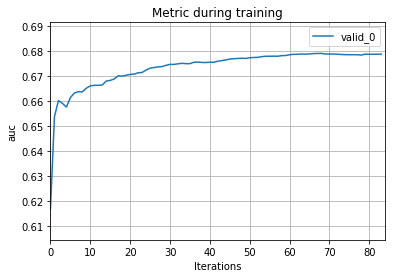

Plot feature importances...


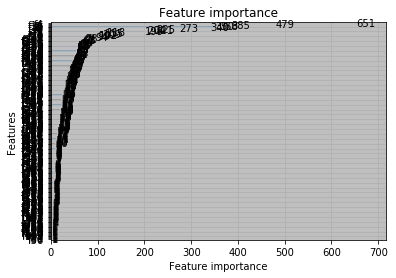

Start predicting...
('predict pos tation', 11574)
218247


In [11]:
test = df_test.fillna(-1)
train = df_train.fillna(-1)

del train['EID']
test_index = test.pop('EID')
# 抽样选择数据
tmp1 = train[train.TARGET==1]
tmp0 = train[train.TARGET==0]
x_valid_1 = tmp1.sample(frac=0.3, random_state=70, axis=0)
x_train_1 = tmp1.drop(x_valid_1.index.tolist())
x_valid_2 = tmp0.sample(frac=0.1, random_state=70, axis=0)
x_train_2 = tmp0.drop(x_valid_2.index.tolist())
X_train_df = pd.concat([x_train_1,x_train_2],axis=0)

y_train = X_train_df.pop('TARGET')
X_test_df = pd.concat([x_valid_1,x_valid_2],axis=0)
y_test = X_test_df.pop('TARGET')

feature_len = X_train_df.shape[1]
print(feature_len)

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train.values
y_test = y_test.values

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 128,
    'learning_rate': 0.08,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
evals_result = {}
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 1000,
                valid_sets=lgb_eval,
                feature_name=['f' + str(i + 1) for i in range(feature_len)],
                early_stopping_rounds= 15 ,
                evals_result=evals_result)

print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='auc')
plt.show()

print('Plot feature importances...')
lgb.plot_importance(gbm,max_num_features=feature_len)
plt.show()

print('Start predicting...')

y_pred = gbm.predict(test.values, num_iteration=gbm.best_iteration)
y_pred = np.round(y_pred,5)
result = pd.DataFrame({'PROB':list(y_pred),
                       })
result['FORTARGET'] = result['PROB'] > 0.22
result['PROB'] = result['PROB'].astype('str')
result['FORTARGET'] = result['FORTARGET'].astype('int')
result = pd.concat([test_index,result],axis=1)

print('predict pos tation',sum(result['FORTARGET']))

result = pd.DataFrame(result).drop_duplicates(['EID'])
result[['EID','FORTARGET','PROB']].to_csv('../submit/evaluation_public1130.csv',index=None)
print(len(result.EID.unique()))